# Random Forest

In [13]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [14]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')

df_training = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')
df1 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
df1.head(5)

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo
0,-1.252208,1.989505,-0.256529,2.334295,-1.157756,-0.265830,0.288184
1,0.381774,-0.109211,-0.424823,-0.319199,0.383163,-0.453909,0.410748
2,0.745530,0.740541,-0.963364,-0.523483,-1.054875,-0.417227,-0.135908
3,-1.208132,0.364140,0.450306,-0.522866,0.629513,-0.465247,-0.777431
4,-1.289433,-1.592000,0.846732,-0.446895,-0.105124,-0.330524,0.098610


In [3]:
training_x = df1
training_y = df_training['popularity_cut']

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
test_x = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test_y = df_test['popularity_cut']

training = RandomForestClassifier(max_depth = 10, n_estimators = 200)
training.fit(training_x, training_y)
print("Accuracy Score:", training.score(test_x, test_y))

def calculate_AUC(y_true, y_pred):
    probs = gmm.predict_proba(X_new)
    
    #Binarize the output
    y_true = label_binarize(y_true, classes=np.arange(len(pred_to_actual)))
    
    #Rearrange probs
    idx = np.empty_like(pred_to_actual)
    idx[pred_to_actual] = np.arange(len(pred_to_actual))
    probs_r = probs[:, idx]

    auc_ovo1 = roc_auc_score(y_true, probs_r, average='weighted', multi_class='ovo' )
    print("AUC average one-versus-one score: %.3f" % auc_ovo1)
    return auc_ovo1

calculate_AUC(gmm, X_reduced["year_bins"], pred_to_actual)

Accuracy Score: 0.6492849155435231


In [4]:
results = training.predict(test_x)
comparison = test_y.to_frame()
comparison['testing_results'] = results
comparison['error'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)

comparison

,popularity_cut,testing_results,error
0,0,0,0
1,1,2,1
2,2,1,1
3,2,2,0
4,2,1,1
...,...,...,...
16986,1,0,1
16987,0,0,0
16988,1,1,0
16989,2,0,1


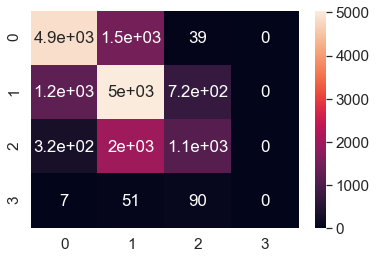

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6414
           1       0.59      0.72      0.65      6991
           2       0.57      0.33      0.42      3438
           3       0.00      0.00      0.00       148

    accuracy                           0.65     16991
   macro avg       0.48      0.45      0.46     16991
weighted avg       0.64      0.65      0.64     16991



In [12]:
df_cm = confusion_matrix(test_y, results)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True) # font size
plt.show()
print(classification_report(test_y, results))

In [15]:
#popularity prediction within year bin0 
df2 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
train0 = df2.loc[df2['year_bins'] == 0]
train_year0_x = train0.drop(['year_bins', 'popularity_cut'], axis = 1)
train_year0_y = train0['popularity_cut']

train_year0_x.head()

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df3 = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test0 = df3.loc[df2['year_bins'] == 0]
test_0_x = test0.drop(['year_bins', 'popularity_cut'], axis = 1)
test_0_y = test0['popularity_cut']

training.fit(train_year0_x, train_year0_y)
print("Accuracy Score:", training.score(test_0_x, test_0_y))

results = training.predict(test_0_x)
comparison = test_0_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)
comparison

Accuracy Score: 0.37906976744186044


,popularity_cut,testing_results,validation
0,0,0,0
7,2,0,1
19,1,0,1
24,1,0,1
29,1,0,1
...,...,...,...
16950,0,0,0
16960,0,0,0
16961,0,0,0
16969,2,0,1


In [16]:
#popularity prediction within year bin1
df2 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
train0 = df2.loc[df2['year_bins'] == 1]
train_year0_x = train0.drop(['year_bins', 'popularity_cut'], axis = 1)
train_year0_y = train0['popularity_cut']

train_year0_x.head()

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df3 = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test0 = df3.loc[df2['year_bins'] == 1]
test_0_x = test0.drop(['year_bins', 'popularity_cut'], axis = 1)
test_0_y = test0['popularity_cut']

training.fit(train_year0_x, train_year0_y)
print("Accuracy Score:", training.score(test_0_x, test_0_y))

results = training.predict(test_0_x)
comparison = test_0_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)
comparison

Accuracy Score: 0.47213181448331976


,popularity_cut,testing_results,validation
6,0,0,0
8,0,0,0
14,0,0,0
15,0,0,0
22,0,0,0
...,...,...,...
16977,1,0,1
16978,2,0,1
16980,2,0,1
16985,2,0,1


In [17]:
#popularity prediction within year bin2
df2 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
train0 = df2.loc[df2['year_bins'] == 2]
train_year0_x = train0.drop(['year_bins', 'popularity_cut'], axis = 1)
train_year0_y = train0['popularity_cut']

train_year0_x.head()

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df3 = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test0 = df3.loc[df2['year_bins'] == 2]
test_0_x = test0.drop(['year_bins', 'popularity_cut'], axis = 1)
test_0_y = test0['popularity_cut']

training.fit(train_year0_x, train_year0_y)
print("Accuracy Score:", training.score(test_0_x, test_0_y))

results = training.predict(test_0_x)
comparison = test_0_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)
comparison

Accuracy Score: 0.40417838489353153


,popularity_cut,testing_results,validation
1,1,1,0
2,2,1,1
4,2,1,1
5,2,1,1
12,2,1,1
...,...,...,...
16971,1,1,0
16979,0,1,1
16983,1,1,0
16987,0,0,0


In [19]:
#popularity prediction within year bin0 
df2 = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
train0 = df2.loc[df2['year_bins'] == 3]
train_year0_x = train0.drop(['year_bins', 'popularity_cut'], axis = 1)
train_year0_y = train0['popularity_cut']

train_year0_x.head()

df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df3 = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'explicit', 'mode', 'key', 'duration_ms', 'valence', 'liveness'], axis = 1)
test0 = df3.loc[df2['year_bins'] == 3]
test_0_x = test0.drop(['year_bins', 'popularity_cut'], axis = 1)
test_0_y = test0['popularity_cut']

training.fit(train_year0_x, train_year0_y)
print("Accuracy Score:",training.score(test_0_x, test_0_y))

results = training.predict(test_0_x)
comparison = test_0_y.to_frame()
comparison['testing_results'] = results
comparison['validation'] = comparison.apply(lambda x: 1 if x.popularity_cut != x.testing_results else 0, axis=1)
comparison

Accuracy Score: 0.391146149181322


,popularity_cut,testing_results,validation
3,2,1,1
9,2,2,0
10,2,1,1
11,2,2,0
17,1,1,0
...,...,...,...
16981,1,2,1
16982,2,2,0
16984,0,1,1
16986,1,2,1


In [20]:
year_training_x = df_training.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
year_training_y = df_training['year_bins']

year_test_x = df_test.drop(['popularity','Unnamed: 0', 'Unnamed: 0.1', 'artists', 'id', 'name', 'year', 'year_bins', 'popularity_cut_labels', 'popularity_qcut', 'popularity_qcut_labels', 'release_date', 'popularity_cut'], axis = 1)
year_test_y = df_test['year_bins']

training1 = RandomForestClassifier(oob_score = True)
training1.fit(year_training_x, year_training_y)
print("Accuray Score:",training1.score(year_test_x, year_test_y))

Accuray Score: 0.7013713142251781


In [21]:
year_results = training1.predict(year_test_x)
comparison2 = year_test_y.to_frame()
comparison2['testing_results'] = year_results
comparison2['error'] = comparison2.apply(lambda x: 1 if x.year_bins != x.testing_results else 0, axis=1)

# wrong = sum(comparison2.error)
# print("Percent accurate: ", 1-wrong/len(comparison2))
comparison2

,year_bins,testing_results,error
0,1,1,0
1,2,3,1
2,3,3,0
3,3,3,0
4,2,2,0
...,...,...,...
16986,2,1,1
16987,0,0,0
16988,2,2,0
16989,2,1,1


              precision    recall  f1-score   support

           0       0.74      0.62      0.68      2126
           1       0.63      0.76      0.69      4855
           2       0.68      0.65      0.67      5006
           3       0.79      0.73      0.76      5004

    accuracy                           0.70     16991
   macro avg       0.71      0.69      0.70     16991
weighted avg       0.71      0.70      0.70     16991



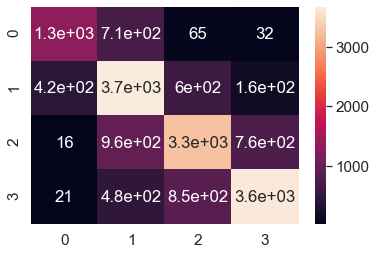

In [24]:
df_cm = confusion_matrix(year_test_y, year_results)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True) # font size
print(classification_report(year_test_y, year_results))
plt.show()